<a href="https://colab.research.google.com/github/DanielRaiicHu/clasificacion_validacion_y_metricas/blob/main/Clasificacion_validacion_y_metricas.ipynb?forceRefresh=true">
  <img src="https://drive.google.com/uc?export=view&id=191Woxwut0iaIL2hCcCIeXRSB6oba_88H" alt="Abrir en Colab" width="120"/>
</a>

# <font color='dark'>**Clasificación: Validación de modelos y métricas de evaluación**</h1>

### Proyecto

Una empresa de financiamiento de automóviles está atravesando una situación complicada, con una alta demanda para una flota reducida de vehículos y un alto número de morosos, lo que está generando grandes pérdidas para la empresa.

Nosotros fuimos contratados para buscar mejoras en la identificación de morosos. El análisis de los clientes actualmente se realiza de forma manual, cliente por cliente, lo que consume mucho tiempo y, aun así, la detección de morosos es muy imprecisa.

Nuestra tarea es utilizar los datos proporcionados por la empresa para **clasificar** a los clientes en cumplidores y morosos.

## <font color='dark'>Clasificando los datos</h1>

### Creando un modelo inicial

In [47]:
import pandas as pd

In [48]:
url = 'https://raw.githubusercontent.com/DanielRaiicHu/clasificacion_validacion_y_metricas/main/prestacar.csv'
datos = pd.read_csv(url)
datos.head()


,ingresos_cliente,anualidad_prestamo,años_casa_propia,telefono_trab,evaluacion_ciudad,score_1,score_2,score_3,score_social,cambio_telefono,moroso
0,12600.0,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0
1,9000.0,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0,0
2,15750.0,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0,0
3,9000.0,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.0,0
4,7650.0,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.0,0


In [49]:
# Separa los datos en variables predictoras (X) y variable objetivo (y)
X = datos.drop(columns='moroso', axis=1)  # X contiene todas las columnas excepto 'moroso'
y = datos.moroso  # y contiene la columna objetivo: si el cliente es moroso

In [50]:
from sklearn.tree import DecisionTreeClassifier  # Importa el modelo de árbol de decisión

modelo = DecisionTreeClassifier()  # Instancia un modelo vacío de árbol de decisión
modelo.fit(X, y)  # Entrena el modelo con los datos completos (sin separar en test/train)
modelo.score(X, y)  # Calcula la exactitud sobre los mismos datos usados para entrenar

1.0

In [51]:
# Imprime el resultado de la exactitud
print(f'La exactitud del modelo es: {modelo.score(X,y)}')
# Resultado esperado: La exactitud del modelo es: 1.0

# Eso se debe a que el modelo se memorizó todos los casos posibles, pero no es lo más recomendable
# Haciendo esto, en el caso de trabajar con un árbol de decisión, siempre va a dar un 100%

La exactitud del modelo es: 1.0


**Análisis del código:**

**¿Qué se hizo?**

* Se cargó un dataset sobre morosidad de clientes.

* Se entrenó un modelo de clasificación (DecisionTreeClassifier) con todos los datos disponibles.

* Se calculó su exactitud usando los mismos datos de entrenamiento.

**¿Qué se identificó?**

* La exactitud fue 1.0 (100%), lo cual indica sobreajuste: el modelo memorizó los datos.

* Este resultado no es confiable, ya que no representa la capacidad real del modelo para predecir datos nuevos.

**¿Qué se puede hacer?**

* Separar los datos en conjuntos de entrenamiento y prueba, o usar validación cruzada.

* Así, se puede verificar si el modelo realmente aprende patrones generales y no solo memoriza.

**Conclusión:**

* Evaluar el modelo con los mismos datos que se usaron para entrenar no permite medir su capacidad de generalización.

* Esto equivale a evaluar a una persona con las mismas preguntas del examen que ya estudió con respuestas incluidas.

* Por eso es fundamental dividir los datos (como en la imagen adjunta) en:

>* Entrenamiento: para aprender.
>
>* Validación: para comparar modelos/hyperparámetros.
>
>* Prueba: para evaluar la capacidad final de predicción en datos nunca vistos.

### Validando el modelo

Evaluar el modelo con los mismos datos utilizados en el entrenamiento no es recomendable. Es necesario que la evaluación se realice con datos independientes.  

Evaluar el modelo con los propios datos de entrenamiento sería equivalente a entregar un examen con las preguntas y las respuestas a una persona y, al momento de evaluarla nuevamente, entregarle un examen con las mismas preguntas y opciones. Se espera que esa persona obtenga un buen resultado, ya que ya ha visto las respuestas y ha memorizado el resultado. Esto es diferente de haber aprendido la materia a partir de ese examen y luego presentar una prueba con contenido similar y obtener un resultado positivo.  

Con el objetivo de verificar la capacidad de generalización de un modelo, debemos dividir el conjunto de datos en tres partes: datos de entrenamiento, validación y prueba.  

- El **conjunto de entrenamiento** se utiliza para entrenar los modelos. A partir de este conjunto, los modelos identifican patrones en los datos.  

- El **conjunto de validación** se emplea para evaluar el desempeño de diferentes modelos con datos nuevos que no fueron utilizados en el entrenamiento.  

- El **conjunto de prueba** se mantiene separado desde el inicio para simular datos del mundo real. No se utiliza en ninguna etapa del entrenamiento ni de la validación, sirviendo como una estimación de la capacidad del modelo elegido para generalizar y predecir nuevos datos.

<a href="https://ibb.co/9H2Z1HZ5"><img src="https://i.ibb.co/0yZs6ysb/datos-train-test.png" alt="datos-train-test" border="0"></a>

In [52]:
# Separa en base de entrenamiento y en base de prueba
from sklearn.model_selection import train_test_split

In [53]:
# test_size = 0.15: El 15% de los datos será para prueba
# stratify: para dejar la misma cantidad de observaciones para morososo, para los 2 conjuntos que estoy separando (Mantiene la proporción original de clases (moroso/no moroso))
# ejemplo: si en mi conjunto de prueba tengo un 10% de morosos, quiero que mi conjunto de entrenamiento también tenga un 10% de morosos
# random_state = 5: replica esta misma división en cualquier momento y de la misma forma

# División inicial entre conjunto general y conjunto de prueba (15% para prueba)
X, X_test,y,y_test = train_test_split(X,y,test_size= 0.15, stratify = y, random_state = 5)

# División secundaria: entrenamiento vs validación (por defecto 75% entrenamiento, 25% validación)
# (Por defecto el tamaño es del 25%) Conjunto de entrenamiento y validación
X_train, X_val,y_train,y_val = train_test_split(X,y, stratify = y, random_state = 5)

In [54]:
# Instanciar el modelo
# Sin límites en el Árbol de Decisión
modelo = DecisionTreeClassifier()       # Crea modelo sin restricción de profundidad
modelo.fit(X_train,y_train)             # Entrena con los datos de entrenamiento
print(f'La exactitud del modelo con el conjunto de entrenamiento es de: {modelo.score(X_train,y_train)}')
print(f'La exactitud del modelo con el conjunto de validación es de: {modelo.score(X_val,y_val)}')

# Respuesta:
# La exactitud del modelo con el conjunto de entrenamiento es de: 1.0
# La exactitud del modelo con el conjunto de validación es de: 0.8495775629300584

# Esta no es la mejor forma de instanciar un modelo de árbol de decisión, sino que debemos colocar una profundidad con max_depth

La exactitud del modelo con el conjunto de entrenamiento es de: 1.0
La exactitud del modelo con el conjunto de validación es de: 0.8462677467119589


In [55]:
# Instanciar el modelo
# Con delimitación en el Árbol de Decisión
modelo = DecisionTreeClassifier(max_depth=10) # Límite de profundidad = 10
modelo.fit(X_train,y_train)                   # Vuelve a entrenar
print(f'La exactitud del modelo con el conjunto de entrenamiento es de: {modelo.score(X_train,y_train)}')
print(f'La exactitud del modelo con el conjunto de validación es de: {modelo.score(X_val,y_val)}')

# Respuesta:
# La exactitud del modelo con el conjunto de entrenamiento es de: 0.9205865272938444
# La exactitud del modelo con el conjunto de validación es de: 0.9057573382109573

# Vemos que está generalizando mejor, porque no se está memorizando todas las salidas y únicamente ajustamos un parámetro.
# Entonces aquí ya comenzamos a encontrar el camino para poder hacer nuestra validación del modelo

La exactitud del modelo con el conjunto de entrenamiento es de: 0.9206445993031359
La exactitud del modelo con el conjunto de validación es de: 0.9058444386377493


### Evaluando el modelo

In [56]:
# Importamos la función confusion_matrix desde sklearn.metrics
# Esta función nos permite calcular una matriz que compara los valores reales (y_val) con los valores predichos (y_previsto)
from sklearn.metrics import confusion_matrix

In [66]:
# Generamos las predicciones del modelo sobre el conjunto de validación
# X_val contiene los datos de entrada (sin la etiqueta), y el modelo devuelve una lista con 0 (cumplido) o 1 (moroso)
y_previsto = modelo.predict(X_val)

# Creamos la matriz de confusión, que muestra cómo se desempeñó el modelo al clasificar:
# - Verdaderos negativos (TN): cumplidores bien clasificados como cumplidores
# - Falsos positivos (FP): cumplidores mal clasificados como morosos
# - Falsos negativos (FN): morosos mal clasificados como cumplidores (¡muy importantes!)
# - Verdaderos positivos (TP): morosos bien clasificados como morosos
matriz_confusion = confusion_matrix(y_val,y_previsto)

# Imprimimos la matriz de confusión en forma de array 2x2
print(matriz_confusion)

# Respuesta:
# [[10359   120]
#  [  962    40]]

[[10358   121]
 [  960    42]]


In [58]:
# Importamos una clase especial para visualizar la matriz de confusión de forma gráfica
from sklearn.metrics import ConfusionMatrixDisplay

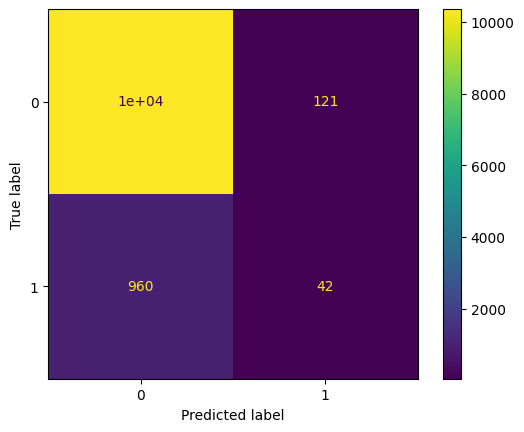

In [65]:
# Creamos un objeto de visualización de la matriz, usando directamente la matriz ya calculada
# Este objeto permite dibujar un gráfico donde los colores representan la cantidad de aciertos/errores
visualizacion = ConfusionMatrixDisplay(matriz_confusion)

# Dibujamos la matriz de confusión en pantalla como un gráfico (colores intensos = más casos)
# Las etiquetas por defecto son los valores 0 y 1 (cumplido y moroso, respectivamente)
visualizacion.plot();

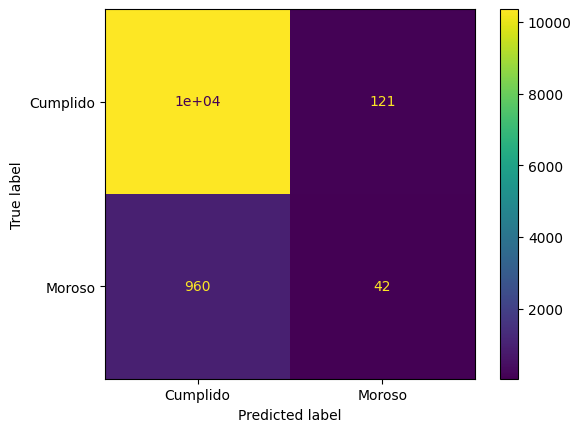

In [64]:
# Creamos nuevamente el objeto de visualización pero esta vez con etiquetas personalizadas
# display_labels nos permite mostrar "Cumplido" y "Moroso" en vez de 0 y 1, lo cual es más comprensible
visualizacion = ConfusionMatrixDisplay(
    confusion_matrix=matriz_confusion,
    display_labels=['Cumplido', 'Moroso']  # Etiquetas para las clases 0 y 1
)

# Volvemos a graficar la matriz, pero ahora con las etiquetas descriptivas
# Esto hace que el gráfico sea más interpretativo para una presentación o informe
visualizacion.plot();

**Análisis y explicación:**

**¿Qué se hizo?**

* Se dividió correctamente el conjunto de datos en tres partes:

>* Entrenamiento (para aprender).
>
>* Validación (para evaluar y ajustar parámetros).
>
>* Prueba (se reservará para el final).

* Se entrenaron dos modelos:

>* Uno sin límite de profundidad (max_depth=None): sobreajuste.
>
>* Uno con max_depth=10: mejor generalización.

* Se generó una matriz de confusión para evaluar el desempeño del segundo modelo (mejor).

**¿Qué se identificó?**

* El primer modelo (sin max_depth) memorizó los datos: 100% exactitud en entrenamiento, pero menos (~85%) en validación.

* El segundo modelo (max_depth=10) fue más realista:

>* Entrenamiento: 92%
>
>* Validación: 90.5%
>
>* Esto indica que generaliza mejor y no memorizó todos los datos.

**Matriz de confusión (valores):**

```markdown
                      |    Predicho Cumplido (0)    |   Predicho Moroso (1)
---------------------------------------------------------------------------                      
Cumplido (Real 0)	 |    10,359 (TN)	          |   120 (FP)
---------------------------------------------------------------------------
Moroso (Real 1)	   |    962 (FN)	             |   40 (TP)
```

* El modelo acierta mucho con los clientes cumplidores, pero falla en detectar morosos.

* Esto se debe probablemente a un desequilibrio de clases (morosos son minoría).

**¿Qué se puede hacer a continuación?**

* Explorar otras métricas además de la exactitud, como:

>* Precisión
>
>* Recall
>
>* F1-score
>
>* AUC

* Intentar técnicas para tratar el desbalance de clases, como:

>* Reentrenamiento con pesos (class_weight)
>
>* Uso de SMOTE para generar más datos de la clase minoritaria
>
>* Cambiar el umbral de decisión

**Conclusión general hasta ahora:**

* Separar los datos correctamente es fundamental para evitar engaños en la evaluación del modelo.

* La profundidad del árbol (parámetro max_depth) influye directamente en su capacidad de generalización.

* La matriz de confusión nos permite ir más allá de la exactitud, detectando errores críticos como los falsos negativos, muy importantes en problemas como la morosidad.

### Desafío: construyendo un segundo modelo (RandomForestClassifier)

---
Segundo modelo (RandomForestClassifier)

* Se recomienda utilizar más de un modelo de clasificación en proyectos de machine learning, para que se comparen los resultados y se elija aquel modelo que tenga un mejor desempeño, después de todos los análisis y mejoras.

* Utilizamos durante la clase el algoritmo de árbol de decisión, pero la biblioteca Scikit-Learn tiene varios otros métodos de clasificación que pueden ser utilizados en nuestro proyecto. Como desafío, utiliza el algoritmo Random Forest para crear un modelo y evaluar el desempeño con la precisión y la matriz de confusión, y compara los resultados con el resultado del árbol de decisión.

* Como un consejo, revisa la documentación del algoritmo RandomForestClassifier. Explora este material y observa cómo importar la función. Durante este proceso, recuerda verificar los parámetros del método para evitar que el modelo se ajuste demasiado a los datos de entrenamiento.

In [61]:
# Importamos el modelo RandomForestClassifier desde el módulo ensemble de sklearn
# Random Forest es un conjunto de múltiples árboles de decisión que trabajan en conjunto
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [62]:
# Instanciamos el modelo de Random Forest con profundidad limitada y random_state para reproducibilidad
modelo_forest = RandomForestClassifier(max_depth=10, random_state=5)

# Entrenamos el modelo con los datos de entrenamiento
modelo_forest.fit(X_train, y_train)

# Imprimimos la precisión del modelo sobre el conjunto de entrenamiento
print(f'Precisión de entrenamiento (Random Forest): {modelo_forest.score(X_train, y_train)}')

# Imprimimos la precisión del modelo sobre el conjunto de validación
print(f'Precisión de validación (Random Forest): {modelo_forest.score(X_val, y_val)}')


# Resultado:
# Precisión de entrenamiento: 0.9153890824622531
# Precisión de validación: 0.9128124727811167

Precisión de entrenamiento (Random Forest): 0.9153890824622531
Precisión de validación (Random Forest): 0.9129866736347008


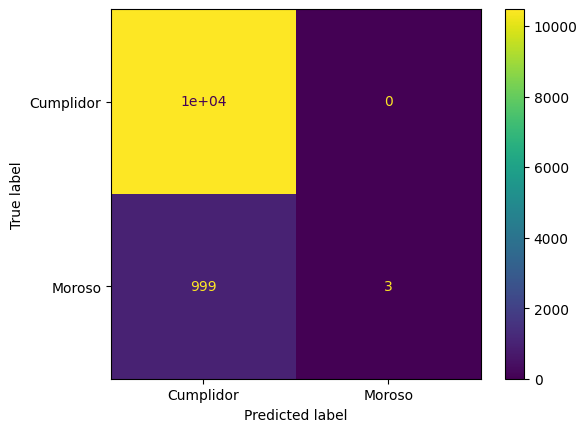

In [63]:
# Generamos predicciones para el conjunto de validación
y_previsto_forest = modelo_forest.predict(X_val)

# Calculamos la matriz de confusión con los valores reales y predichos
matriz_confusion_forest = confusion_matrix(y_val, y_previsto_forest)

# Visualizamos la matriz de confusión con etiquetas personalizadas
visualizacion_forest = ConfusionMatrixDisplay(
    confusion_matrix=matriz_confusion_forest,
    display_labels=['Cumplidor', 'Moroso']
)
visualizacion_forest.plot();

**ANÁLISIS Y EXPLICACIÓN:**

**¿Qué hiciste?**

* Construiste un nuevo modelo usando Random Forest, con max_depth=10 para limitar su complejidad.

* Evaluaste su precisión en entrenamiento y validación.

* Generaste una matriz de confusión para entender mejor los aciertos y errores.

**Resultados obtenidos:**


```
                           Árbol de Decisión	    Random Forest
Entrenamiento	          0.9206	               0.9154
Validación	             0.9058	               0.9128 (mejor)
TP (Moroso detectado)	  40	                   4 🔻 (empeoró)
FN (Moroso no detectado)   962	                  998 🔺 (muchos más)
```

Aunque la precisión general mejoró, la capacidad del modelo para detectar morosos cayó significativamente (solo detectó 4 de casi 1000). Esto es un ejemplo clásico donde la precisión engaña, y debemos revisar métricas como recall para la clase minoritaria.

---
**En esta clase, aprendiste a:**

* Crear un modelo de clasificación usando Scikit-Learn;
* Validar modelos a partir de la división de datos de entrenamiento, validación y prueba;
* Evaluar el rendimiento de los modelos usando la precisión;
* Analizar los aciertos y errores del modelo con la matriz de confusión.

## <font color='dark'>Métricas de evaluación</h1>

### Exactitud, precisión y recall (sensibilidad).

<a href="https://ibb.co/351SbY7t"><img src="https://i.ibb.co/wZypqrRD/matriz-confusion.png" alt="matriz-confusion" border="0"></a>

<a href="https://imgbb.com/"><img src="https://i.ibb.co/6Jp6rKyC/Captura-de-tela-2025-03-22-120744.png" alt="Captura-de-tela-2025-03-22-120744" border="0"></a>

### Curva ROC

In [ ]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/dariyasydykova/open_projects/master/ROC_animation/animations/cutoff.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)




### Curva de  precisión x sensibilidad

In [ ]:
Image(url='https://paulvanderlaken.com/wp-content/uploads/2019/08/roc.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)


### Informe de métricas

## <font color='dark'> Validación cruzada</h1>

### Usando KFold

La validación del modelo de clasificación a partir de la separación de los datos en conjuntos de entrenamiento y validación hace que el resultado dependa en gran medida de esta división. Puede suceder que, de forma aleatoria, el patrón de los datos de validación sea diferente al de los datos de entrenamiento, lo que podría llevar a obtener un resultado mucho mejor o mucho peor que la realidad simplemente por suerte o mala suerte.  

Teniendo esto en cuenta, es posible utilizar la **validación cruzada**, una estrategia más consistente y ampliamente utilizada en proyectos de *machine learning*.  

En la validación cruzada, en lugar de separar los datos en entrenamiento y validación una sola vez, se dividen en varias partes de igual tamaño. En cada una de estas divisiones, se usa una parte para validación y todas las demás para entrenamiento. Este proceso se repite hasta que todas las partes hayan sido utilizadas tanto para validación como para entrenamiento.  

Se generará un modelo para cada una de estas divisiones y la evaluación del desempeño se realizará promediando la métrica de cada modelo. Esto elimina la dependencia de la separación de los datos, ya que hay una mayor variación en la selección de los mismos y se obtiene un valor medio.  

Generalmente, se utilizan 5 o 10 partes. Un número mayor no suele ser necesario, ya que implica un procesamiento más costoso, y valores menores ya ayudan a mitigar el problema de la selección de los datos.

<a href="https://ibb.co/KcBtshJR"><img src="https://i.ibb.co/nq4X1mFZ/train-y-validacion.png" alt="train-y-validacion" border="0"></a>

### Validación cruzada con sensibilidad

### Estratificando los datos

## <font color='dark'>Balanceo de los datos</h1>

### Oversampling

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#id1

### Pipeline para validación

### Undersampling

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html

### Probando el modelo

## Desafío: Hora de la práctica

Vamos a practicar el contenido que se presentó en la clase a partir de algunas actividades, pero utilizando un conjunto de datos diferente con datos de pacientes a ser diagnosticados con diabetes o no. Los desafíos siguen una secuencia de tareas, sirviendo como un proyecto secundario. Para realizar los desafíos, descarga la base de datos desde este [enlace](https://github.com/alura-es-cursos/2162-clasificacion-validacion-de-modelos-y-metricas/blob/desafios/diabetes.csv).



### 1) Clasificando Datos

* **1 -** Para la construcción de un modelo de machine learning se necesitan datos. Como tarea inicial, realiza la lectura de la base de datos de diabetes y divide los datos en variables explicativas y variable objetivo (x e y). La variable objetivo es la columna que quieres clasificar, que contiene la información de si el paciente tiene o no diabetes. Las variables explicativas son todas las columnas excepto la de diabetes. La separación de los datos se puede hacer con la selección de columnas con pandas.

* **2 -** Una etapa muy importante en proyectos de clasificación es la validación de los modelos, para identificar si hay una generalización del modelo para datos nuevos. Realiza la división de los datos entre entrenamiento, validación y prueba. Utiliza el 5% de los datos para prueba y con el resto, deja el 25% para validación. En el momento de la separación, usa el parámetro stratify a partir de la variable objetivo para mantener la proporción de los datos.

* **3 -** La etapa de modelado de datos consiste en utilizar un algoritmo capaz de identificar patrones en los datos y clasificar los valores. A partir del modelo es posible extraer una tasa de acierto para entender su desempeño. Crea 2 modelos utilizando los algoritmos DecisionTreeClassifier y RandomForestClassifier y evalúa la precisión de entrenamiento y prueba, eligiendo el valor 3 para el parámetro max_depth del algoritmo DecisionTreeClassifier y el valor 2 para el max_depth del algoritmo RandomForestClassifier, para que los modelos no se especialicen demasiado en el patrón de los datos de entrenamiento.

* **4 -** La tasa de acierto generalmente no proporciona información suficiente para entender el comportamiento del modelo. La matriz de confusión es una herramienta más completa, capaz de proporcionar los aciertos y errores del modelo para cada clase. Construye una matriz de confusión para cada uno de los modelos para evaluar el desempeño de la predicción. Para construir la matriz, usa el método predict para generar las predicciones de los valores y comparar con los valores reales de la base de datos.

In [67]:
import pandas as pd

In [68]:
url_desafio = 'https://raw.githubusercontent.com/DanielRaiicHu/clasificacion_validacion_y_metricas/main/diabetes.csv'
datos_desafio = pd.read_csv(url_desafio)
datos_desafio

,glicemia,presion_sanguinea,grasa_subcutanea_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1
...,...,...,...,...,...,...
389,88,44,510,43.3,0.222,1
390,88,39,110,36.5,1.057,1
391,58,26,16,28.4,0.766,0
392,76,48,180,32.9,0.171,0
